# Clusterization

- The task of clustering is to find a "natural" grouping of objects into "clusters."

- The goal is:
  - Within a single cluster, objects should be close to each other.
  - Objects from different clusters should be far from each other.

## Applications

- When searching on the Internet, thousands of results are often returned, but the user can only review a few of them.

- Due to the ambiguity of language, the results may belong to different domains.

- By clustering the results of the query, the first page can return a few results from each cluster.

# Classification ⇔ Clustering

- In classification, we have predefined classes and a dataset of classified examples ⇔ in clustering, we have neither predefined classes, their number, nor classified examples.

- In classification, the goal is to find a function (classifier) that determines the class of a given example based on similarity to classified examples ⇔ in clustering, the goal is to partition the dataset based on implicit patterns in the examples.

- The classification task is an example of "supervised learning" ⇔ the clustering task is an example of "unsupervised learning."

# K-means

- Given a set of vectors $\mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_S\} \subset \mathbb{R}^N$ and a number $K \in \mathbb{N}$.

- We aim to partition $\mathbf{X}$ into $K$ clusters $W_1, W_2, \dots, W_K \subset \mathbf{X}$ such that:  
  $W_1 \cup W_2 \cup \dots \cup W_K = \mathbf{X}$, and:

  $$
  RSS(W_1, W_2, \dots, W_K) = \sum_{k=1}^K \sum_{\mathbf{x} \in W_k} \|\mathbf{x} - \mu_k\|^2
  $$

  is minimized, where:

  $$
  \mu_k = \frac{1}{|W_k|} \sum_{\mathbf{x} \in W_k} \mathbf{x}, \quad \text{for } k = 1, 2, \dots, K.
  $$

- $\mu_k$ is the centroid (center of mass) of $W_k$.

# K-means Algorithm

1. Start with initial centroids $\mu_1, \mu_2, \dots, \mu_K$.

2. For each centroid $\mu_k$, find the cluster $W_k$:
   $$
   W_k = \{\mathbf{x} \in \mathbf{X} \mid \arg \min_{i=1, \dots, K} \|\mathbf{x} - \mu_i\|^2 = k\}.
   $$

3. Compute the new values of the centroids:
   $$
   \mu_k = \frac{1}{|W_k|} \sum_{\mathbf{x} \in W_k} \mathbf{x}.
   $$

4. Repeat steps 2-3 until a stopping condition is met.

# K-means Algorithm

```plaintext
K-means({x[1], ..., x[S]}, K)
1. (μ[1], ..., μ[K]) <- SelectSeeds({x[1], ..., x[S]}, K)
2. while stopping criterion has not been met do
3.     for k <- 1 to K do
4.         ω[k] <- {}
5.     for i <- 1 to S do
6.         k <- argmin_j(‖μ[j] - x[i]‖^2)
7.         ω[k] <- ω[k] ∪ {x[i]}
8.     for k <- 1 to K do
9.         μ[k] <- (1 / |ω[k]|) ∑_{x ∈ ω[k]} x
10. return {μ[1], ..., μ[K]}
```

### Explanation:
1. **Initialization**: Select initial centroids $\mu[1], \dots, \mu[K]$.
2. **Iteration**:
   - Assign each data point $x[i]$ to the nearest centroid $\mu[j]$.
   - Update each centroid $\mu[k]$ as the mean of all points assigned to cluster $k$.
3. **Stopping Criterion**: Repeat until centroids stabilize or a predefined condition is met.


### Statement 1:
Let fixed vectors $\mu_1, \mu_2, \dots, \mu_K \in \mathbb{R}^N$ and $W_1, W_2, \dots, W_K \subset \mathbf{X}$ be defined as:  
$$
W_k = \{\mathbf{x} \in \mathbf{X} \mid \arg \min_i \|\mathbf{x} - \mu_i\|^2 = k\}, \quad \text{for } k = 1, 2, \dots, K.
$$  
Let $W_1', W_2', \dots, W_K' \subset \mathbf{X}$ be any other partition of $\mathbf{X}$. Then:  
$$
RSS(W_1, W_2, \dots, W_K) = \sum_{k=1}^K \sum_{\mathbf{x} \in W_k} \|\mathbf{x} - \mu_k\|^2 \leq \sum_{k=1}^K \sum_{\mathbf{x} \in W_k'} \|\mathbf{x} - \mu_k\|^2.
$$

### Proof:
Let $k(\mathbf{x}) = \arg \min_i \|\mathbf{x} - \mu_i\|^2$ and $l(\mathbf{x}) = l \iff \mathbf{x} \in W_l'$. Then:  
$$
\sum_{k=1}^K \sum_{\mathbf{x} \in W_k'} \|\mathbf{x} - \mu_k\|^2 = \sum_{\mathbf{x} \in \mathbf{X}} \|\mathbf{x} - \mu_{l(\mathbf{x})}\|^2 \geq \sum_{\mathbf{x} \in \mathbf{X}} \|\mathbf{x} - \mu_{k(\mathbf{x})}\|^2.
$$  
Thus:  
$$
\sum_{k=1}^K \sum_{\mathbf{x} \in W_k'} \|\mathbf{x} - \mu_k\|^2 \geq \sum_{k=1}^K \sum_{\mathbf{x} \in W_k} \|\mathbf{x} - \mu_k\|^2 = RSS(W_1, W_2, \dots, W_K).
$$

### Statement 2:
Let $W \subset \mathbb{R}^N$ be a given set. Then:
$$
\arg \min_{\mathbf{y} \in \mathbb{R}^N} \sum_{\mathbf{x} \in W} \|\mathbf{x} - \mathbf{y}\|^2 = \frac{1}{|W|} \sum_{\mathbf{x} \in W} \mathbf{x}.
$$

### Proof:
$$
\frac{\partial}{\partial \mathbf{y}} \sum_{\mathbf{x} \in W} \|\mathbf{x} - \mathbf{y}\|^2 = 2|W|\mathbf{y} - 2 \sum_{\mathbf{x} \in W} \mathbf{x} = 0 \implies \mathbf{y} = \frac{1}{|W|} \sum_{\mathbf{x} \in W} \mathbf{x}.
$$

$$
\frac{\partial^2}{\partial \mathbf{y}^2} \sum_{\mathbf{x} \in W} \|\mathbf{x} - \mathbf{y}\|^2 = \frac{\partial}{\partial \mathbf{y}} \left( 2|W|\mathbf{y} - 2 \sum_{\mathbf{x} \in W} \mathbf{x} \right) = 2|W|\mathbf{I}.
$$

Thus, the Hessian is a positive definite matrix, and the point where the gradient is zero is a global minimum.

### Corollary:
At every step of the algorithm, the RSS decreases or remains the same.

## Stopping Conditions

- The RSS function is discrete. Finding the global extremum is an NP-complete problem.

- Heuristic solutions:
  - When RSS stops improving.
  - When the improvement in RSS is below a certain threshold.
  - After a predefined number of iterations.

| Training  | Final centroids |
| ------------- | ------------- |
| 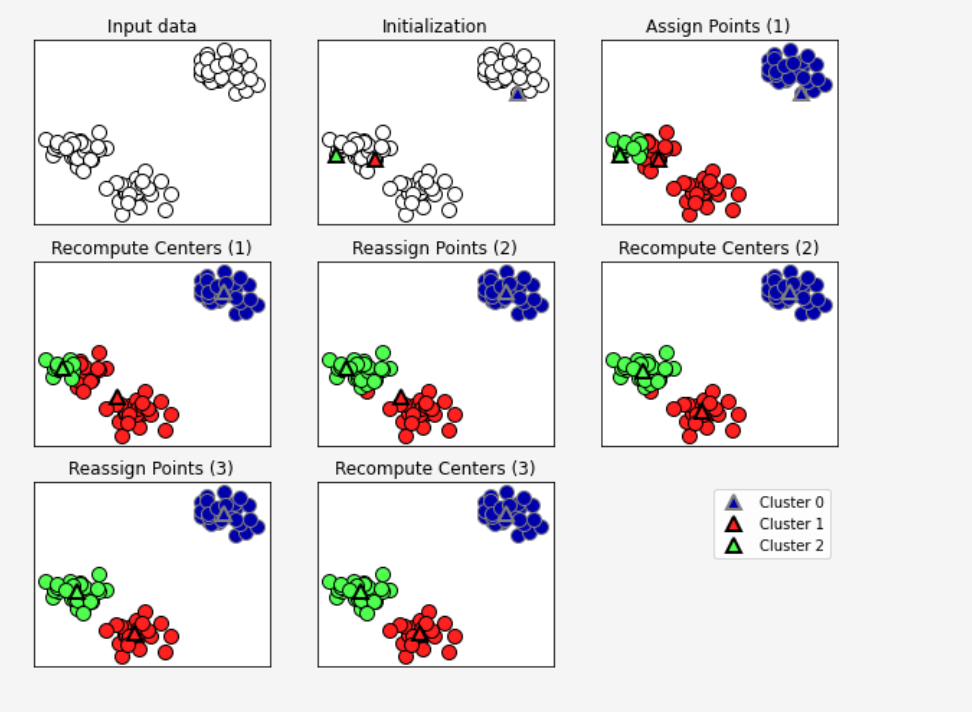   | 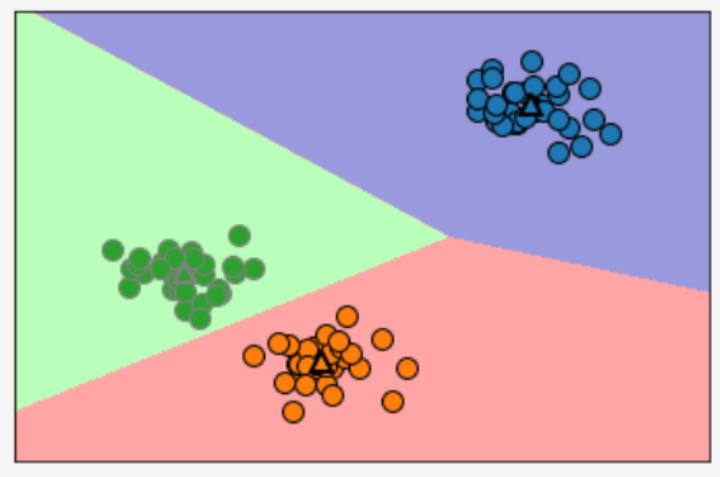  |



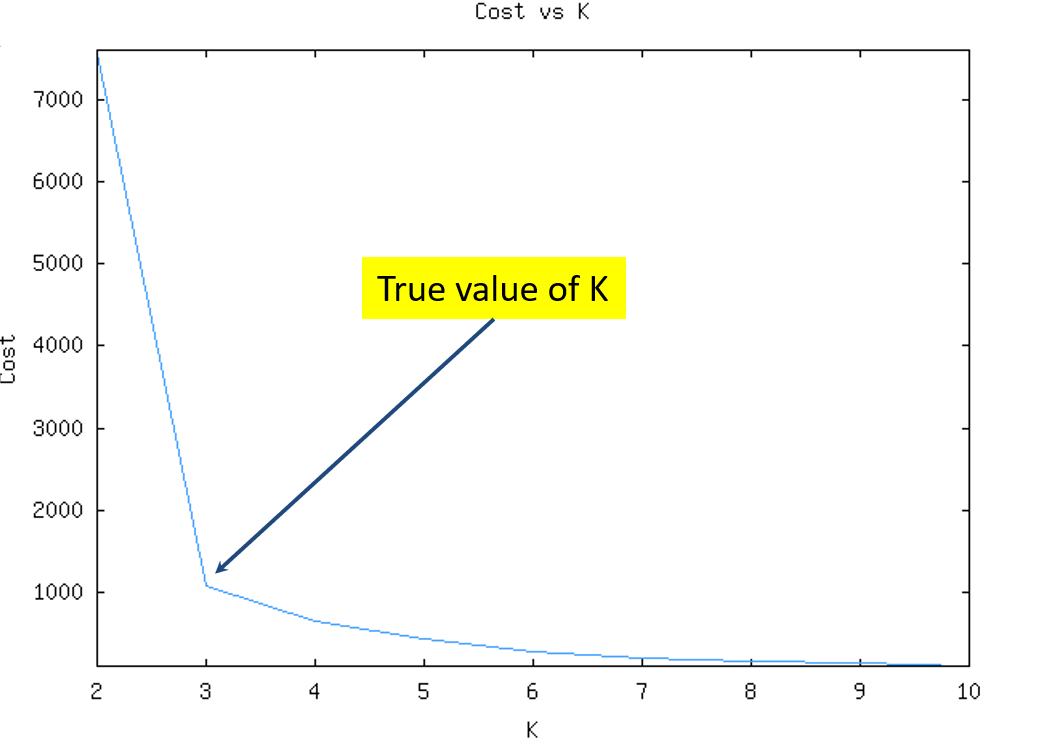

## Initial Centroids

It turns out that the result of clustering with k-means heavily depends on the initial centroids.

### Variants:
1. Select the first $K$ vectors from $\mathbf{X}$ and run the k-means algorithm — the simplest but naive approach.

2. Select $K$ vectors from $\mathbf{X}$ uniformly at random and run the k-means algorithm.

3. Repeat step 2 several times and choose the result with the best RSS.

4. Choose the initial centroids to probabilistically maximize their separation: **k-means++**.

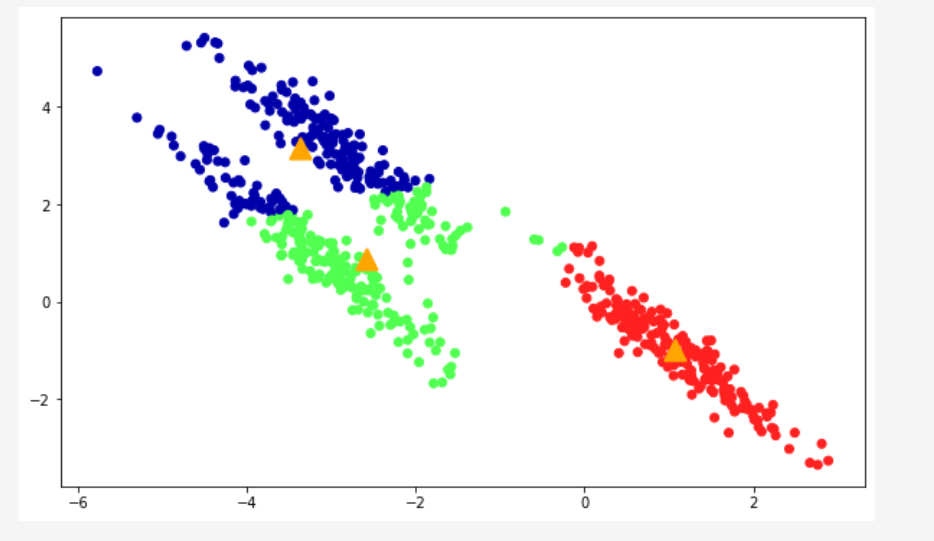

## K-means++

1. Select the first centroid $\mu_1$ uniformly at random from $\mathbf{X}$.

2. Suppose we have already selected centroids $\mu_1, \mu_2, \dots, \mu_l$. Let:
   $$
   D(\mathbf{x}) = \min_{i=1, \dots, l} \|\mathbf{x} - \mu_i\|
   $$
   Define a probability distribution over $\mathbf{X}$ such that for each vector $\mathbf{x} \in \mathbf{X}$:
   $$
   \text{Pr}[\mathbf{x}] = \frac{D(\mathbf{x})^2}{\sum_{\mathbf{x}' \in \mathbf{X}} D(\mathbf{x}')^2}.
   $$
   Select the next centroid $\mu_{l+1}$ from $\mathbf{X}$ according to the probability distribution $\text{Pr}[\mathbf{x}]$.

3. Repeat steps 2-3 until $K$ centroids are selected.

4. Run the k-means algorithm with the selected centroids.


### Guarantee:
It is proven that:
$$
\mathbb{E}[\text{RSS}_{\text{k-means++}}] \leq 8 (\ln k + 2) \text{RSS}_{\text{min}}.
$$

**Reference**:  
Arthur, D.; Vassilvitskii, S. (2007). ["k-means++: the advantages of careful seeding."](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms. Society for Industrial and Applied Mathematics Philadelphia, PA, USA. pp. 1027–1035.

## Soft K-means

Soft assigns a point to clusters (so it give a probability of any point belonging to any centroid).
It doesn't depend on the L2 norm, but is based on the Expectation, i.e., the probability of the point belonging to a particular cluster. This makes K-means biased towards spherical clusters.

[Soft K-means](https://www.youtube.com/watch?v=fpM0iZTjLhM)

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('Data/fmi.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [250, 255, 255],
        [250, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [250, 255, 255],
        [250, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       ...,

       [[ 71, 101,  11],
        [ 54,  83,   0],
        [ 91, 119,  32],
        ...,
        [ 23,  68,   1],
        [ 24,  71,   1],
        [ 28,  75,   5]],

       [[ 82, 115,  26],
        [ 91, 124,  35],
        [ 75, 105,  19],
        ...,
        [ 17,  62,   0],
        [ 20,  67,   0],
        [ 29,  76,   6]],

       [[ 94, 129,  39],
        [ 85, 120,  30],
        [ 97, 127,  41],
        ...,
        [ 24,  69,   2],
        [ 24,  71,   1],
        [ 29,  76,   6]]

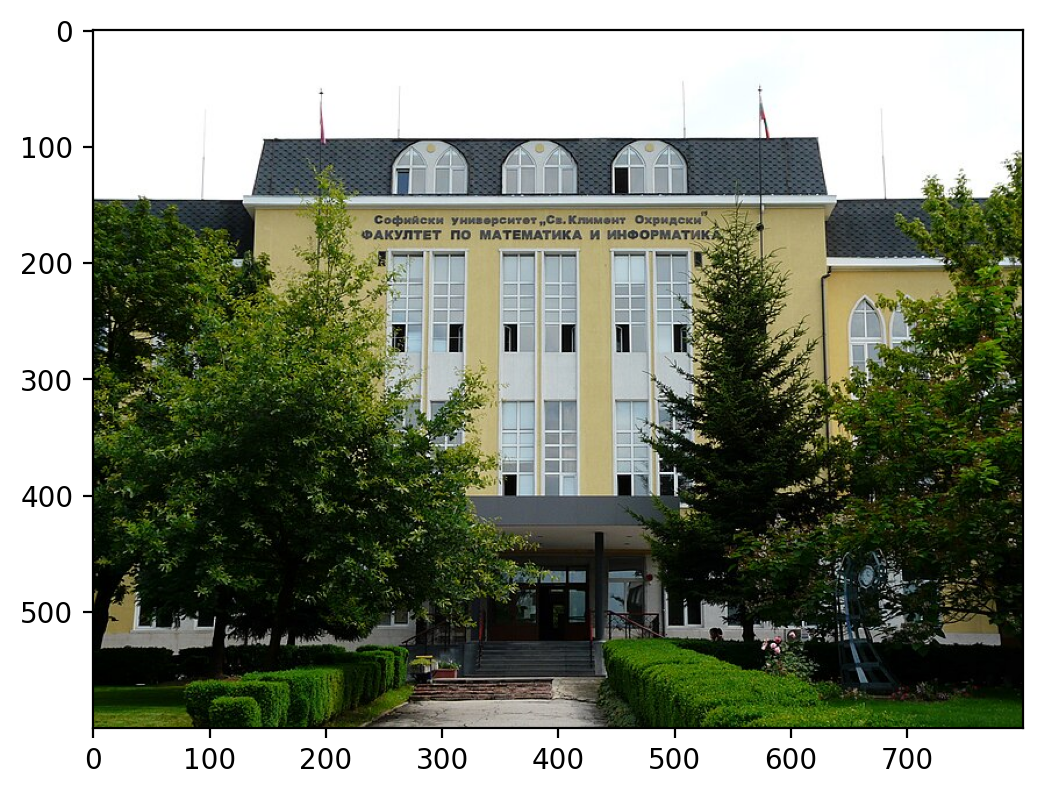

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(600, 800, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [9]:
# try x for x in [4, 32] clusters
model = KMeans(n_clusters=16)

In [10]:
model

KMeans(n_clusters=16)

In [11]:
labels = model.fit_predict(image_as_array2d)

c:\Users\MSI\anaconda3\envs\AI\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MSI\anaconda3\envs\AI\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [12]:
labels

array([ 5,  5,  5, ..., 14, 14, 14], dtype=int32)

In [13]:
# THESE ARE THE x RGB COLOR CODES!
model.cluster_centers_

array([[  3.9862911 ,  10.13090183,   1.99341576],
       [205.11135628, 213.17218299, 212.63261253],
       [ 92.55532065, 109.13152668,  39.44769044],
       [151.78331572, 160.57849008, 161.43841728],
       [ 40.03251236,  47.2811651 ,  36.64414555],
       [253.99887874, 254.69314031, 254.64434872],
       [123.44469108, 128.37129116, 122.98601554],
       [ 62.76511338,  70.0060304 ,  62.75629205],
       [186.01608233, 176.77394741, 125.49910002],
       [ 83.63639471,  90.85654997,  90.3146819 ],
       [ 18.70707   ,  30.23342914,   8.69285639],
       [162.054636  , 155.42156145, 102.74454372],
       [ 63.90214286,  88.2121875 ,  16.61638393],
       [180.25854408, 189.36968567, 188.10444895],
       [ 37.86083822,  59.98544067,   7.52325253],
       [123.82696391, 128.27813163,  71.58519108]])

In [14]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [15]:
rgb_codes

array([[  4,  10,   2],
       [205, 213, 213],
       [ 93, 109,  39],
       [152, 161, 161],
       [ 40,  47,  37],
       [254, 255, 255],
       [123, 128, 123],
       [ 63,  70,  63],
       [186, 177, 125],
       [ 84,  91,  90],
       [ 19,  30,   9],
       [162, 155, 103],
       [ 64,  88,  17],
       [180, 189, 188],
       [ 38,  60,   8],
       [124, 128,  72]])

In [16]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [17]:
quantized_image

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       ...,

       [[ 64,  88,  17],
        [ 64,  88,  17],
        [ 93, 109,  39],
        ...,
        [ 38,  60,   8],
        [ 38,  60,   8],
        [ 38,  60,   8]],

       [[ 93, 109,  39],
        [ 93, 109,  39],
        [ 64,  88,  17],
        ...,
        [ 38,  60,   8],
        [ 38,  60,   8],
        [ 38,  60,   8]],

       [[ 93, 109,  39],
        [ 93, 109,  39],
        [ 93, 109,  39],
        ...,
        [ 38,  60,   8],
        [ 38,  60,   8],
        [ 38,  60,   8]]

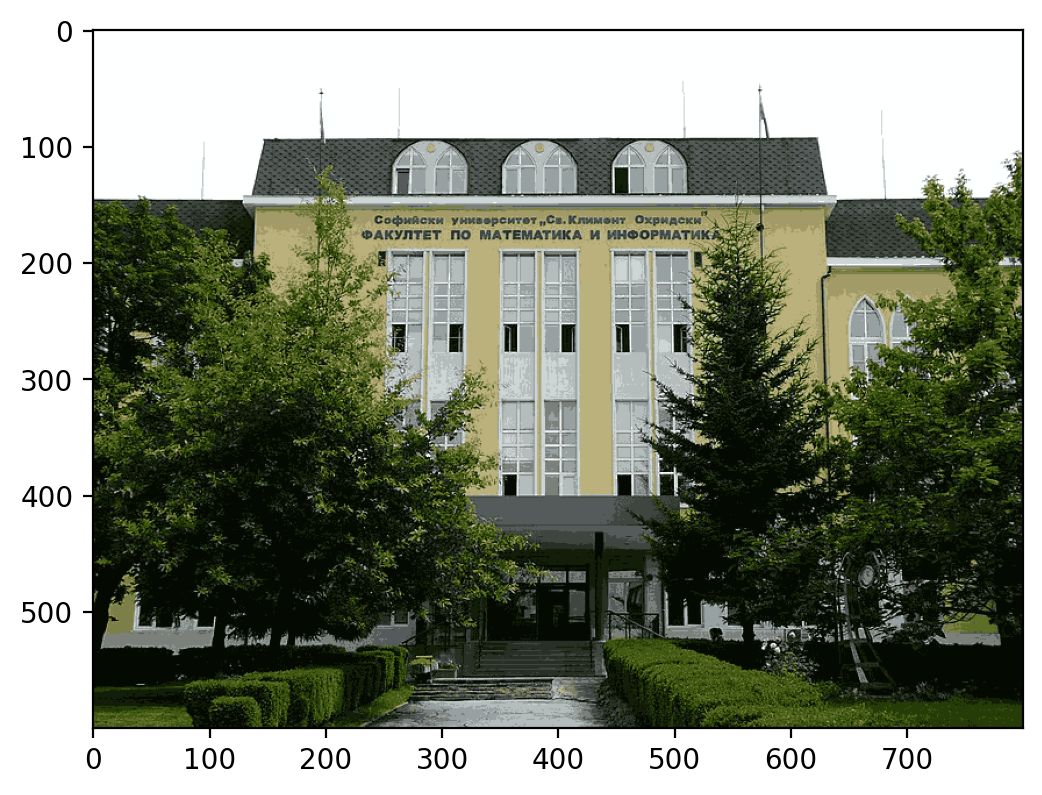

In [18]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

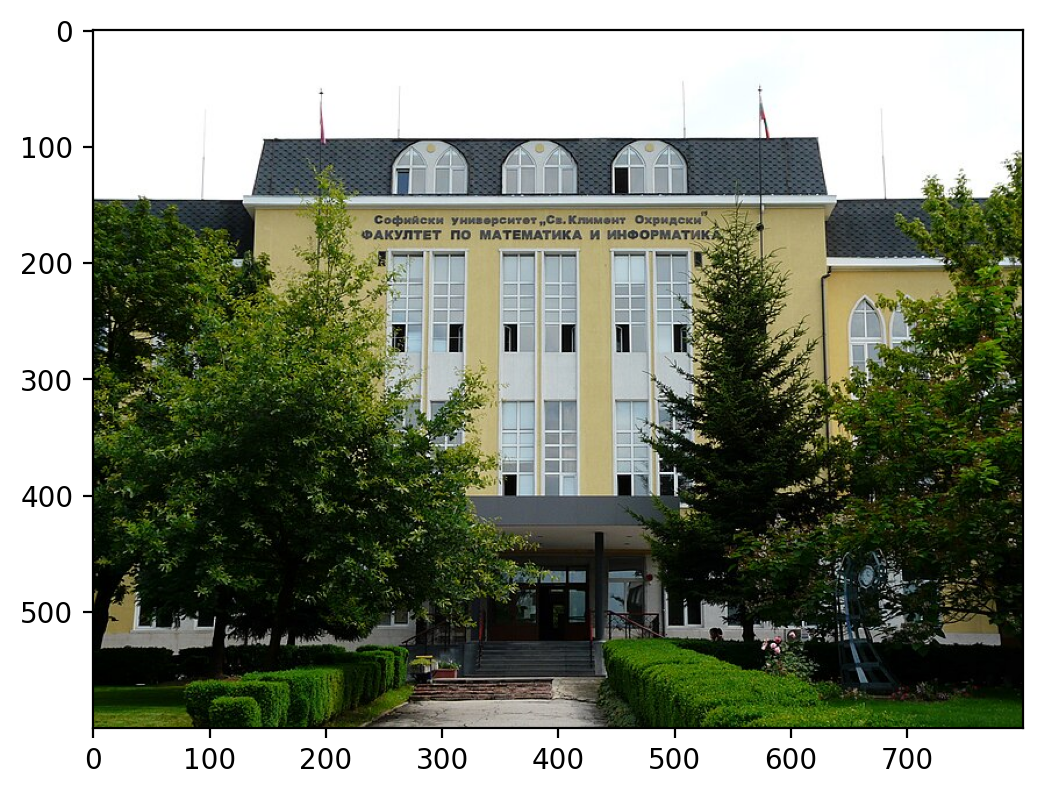

In [19]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Hierarchical Clustering

Two types of hierarchical clustering:

- Divisive (top down), and agglomerative (bottom up)

Hierarchical K-means is a divisive method

- Start with all the data in 1 cluster
- Split using “flat” K-means
- For each cluster, recursively split each cluster

K is usually small

Need to decide when to stop


## Divisive Methods 
## Hierarchical K-Means

| Training  | Final centroids |
| ------------- | ------------- |
| 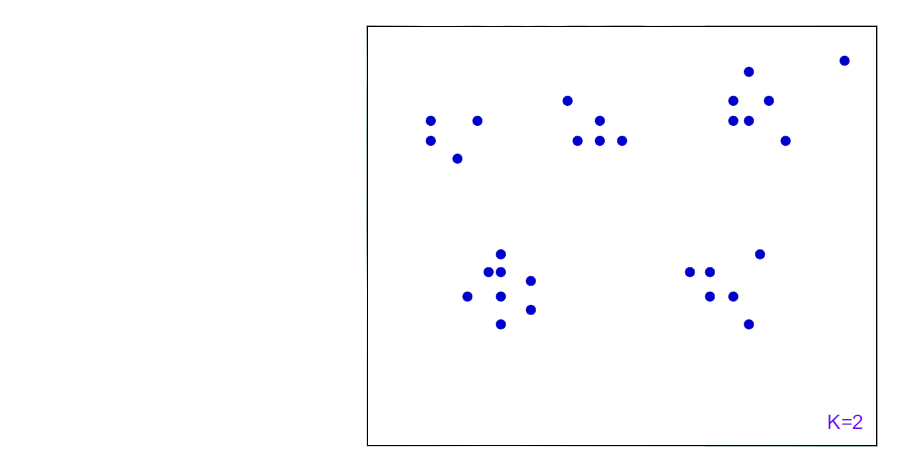   | 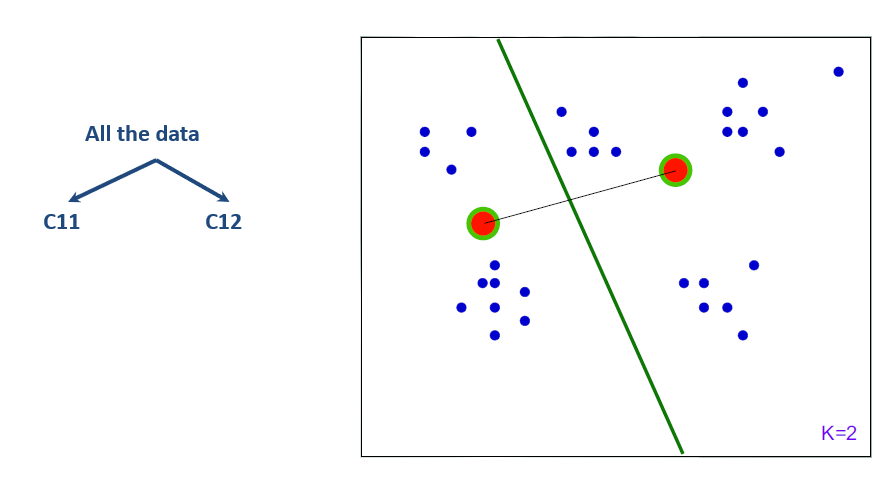  |
| 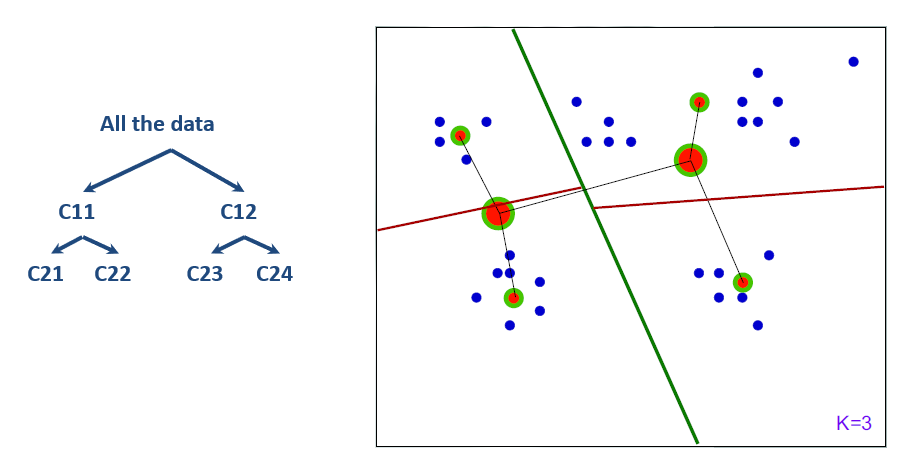   | 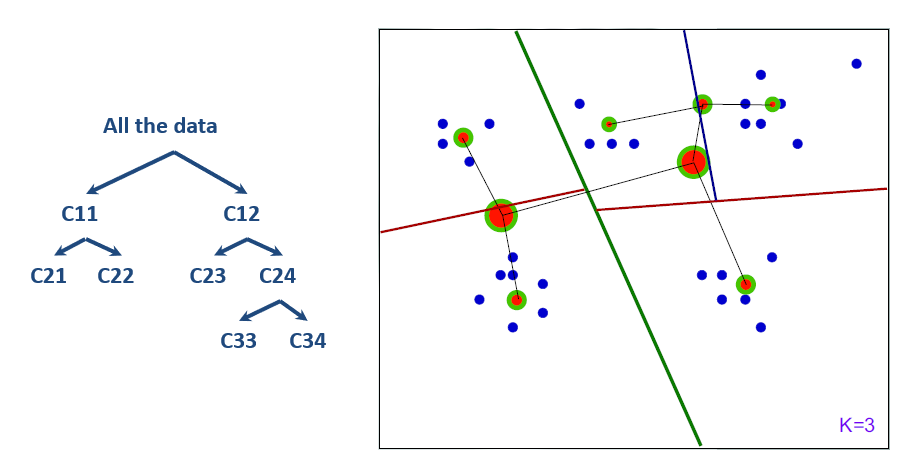  |


## Agglomerative Techniques
## Agglomerative Clustering

- Work in reverse direction (bottom up)

```psuedocode
Given N data points and dissimilarity measure:
    Start with all the data in separate classes
    Repeat N-1 times:
        Find closest two groups and merge them

```


| A dendrogram is a diagram that shows the hierarchical relationship between objects  | We can use it to decide how many clusters we need |
| ------------- | ------------- |
|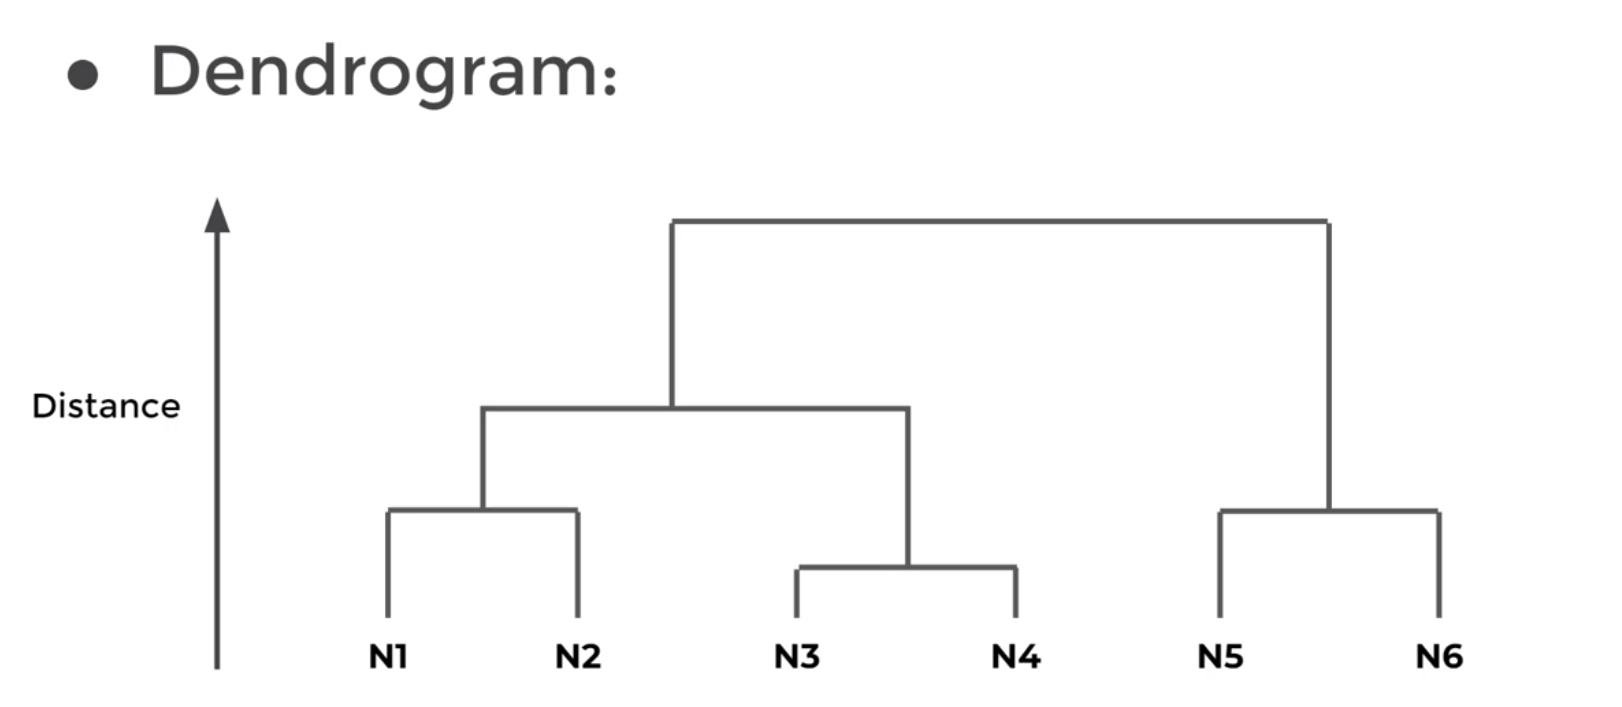  | 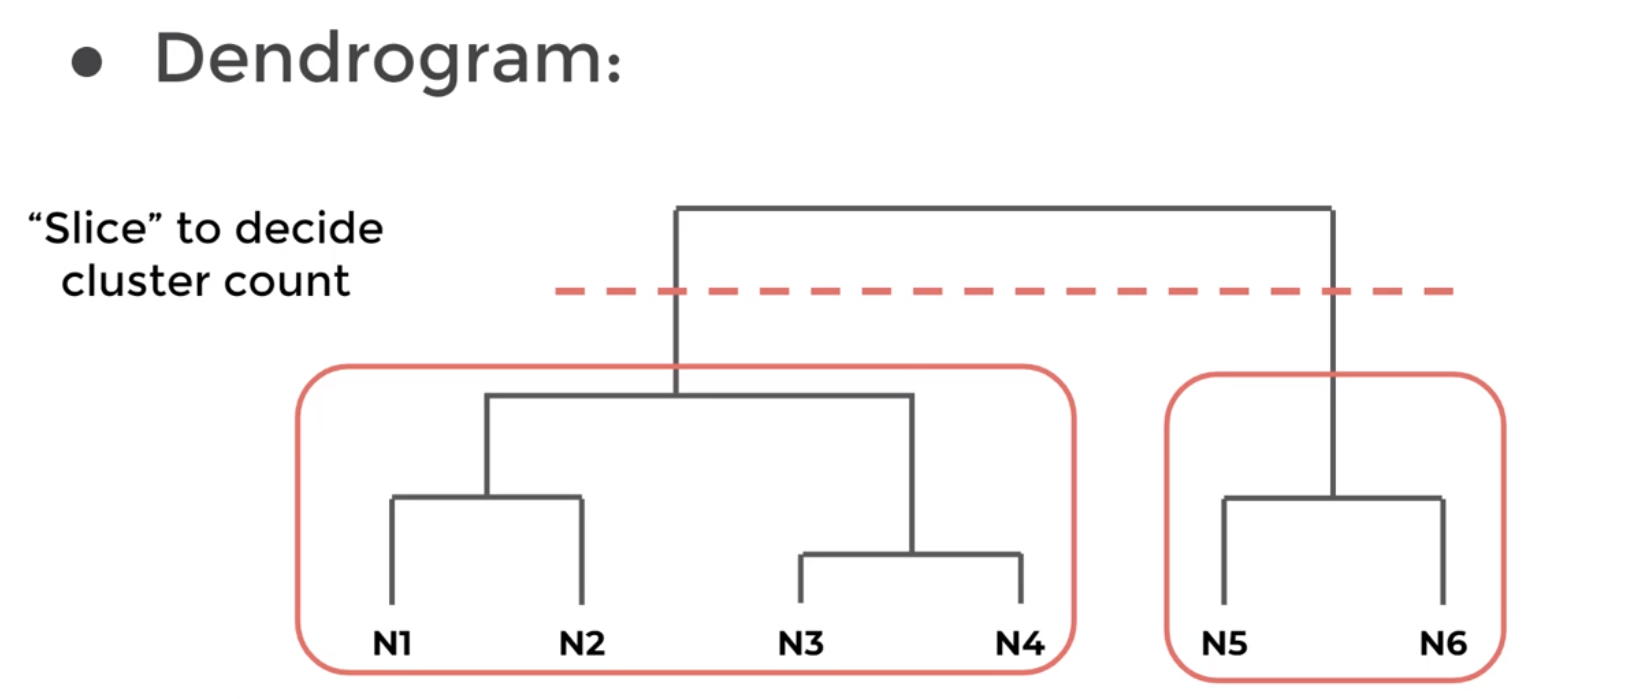  |

| How do we measure dissimilarity between groups?  | Final centroids |
| ------------- | ------------- |
| 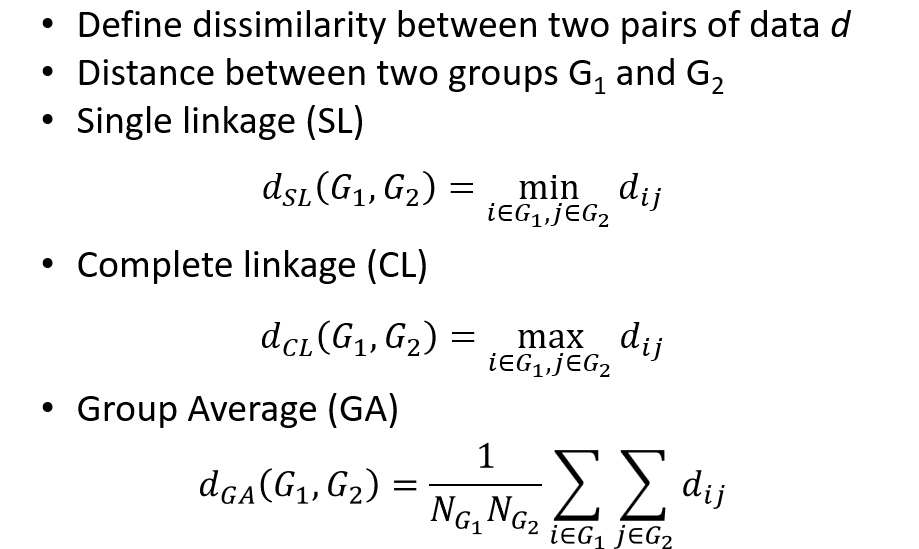   | 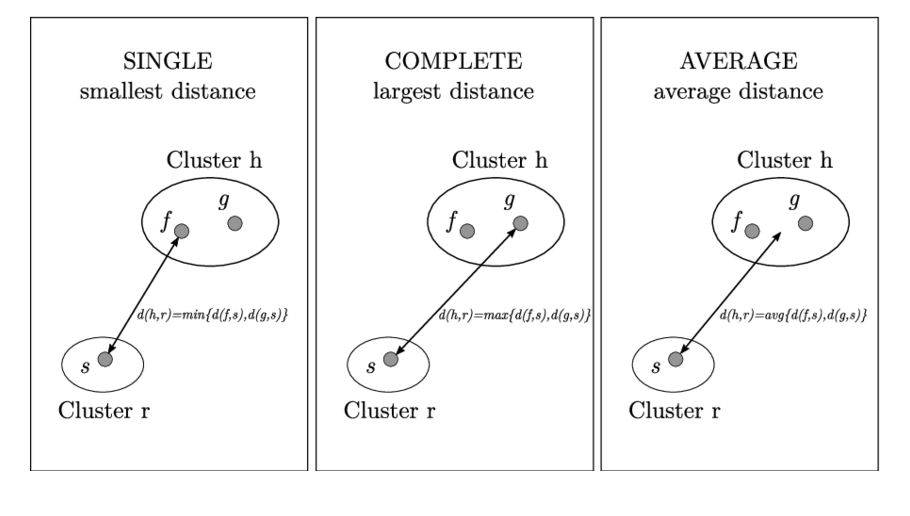  |

- If data is not nicely clustered, you will get different clusters
- If data is nicely clustered, particular choice doesn’t matter
- Single Link -> Less compact clusters
- Group Average -> Medium compact clusters 
- Complete Link -> More compact clusters


In [20]:
from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
def plot_clusters(data, cluster_ids):
    plt.scatter(data[:,0], data[:,1], c = cluster_ids)
    plt.show()

In [22]:
hierarchical_blobs, hierarchical_clusters = make_blobs()

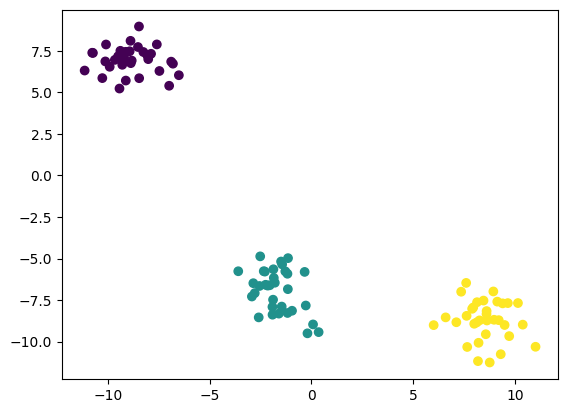

In [23]:
plot_clusters(hierarchical_blobs, hierarchical_clusters)

In [24]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [25]:
aggl.fit(hierarchical_blobs)

AgglomerativeClustering(n_clusters=3)

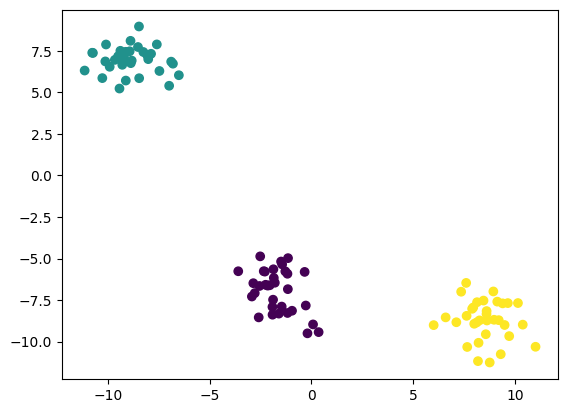

In [26]:
plot_clusters(hierarchical_blobs, aggl.labels_)

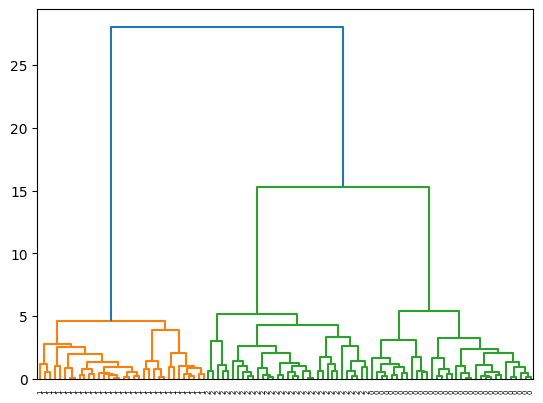

In [27]:
row_clusters = linkage(hierarchical_blobs, method = "complete", metric = "euclidean")

dendrogram(row_clusters, labels = aggl.labels_)

plt.show()

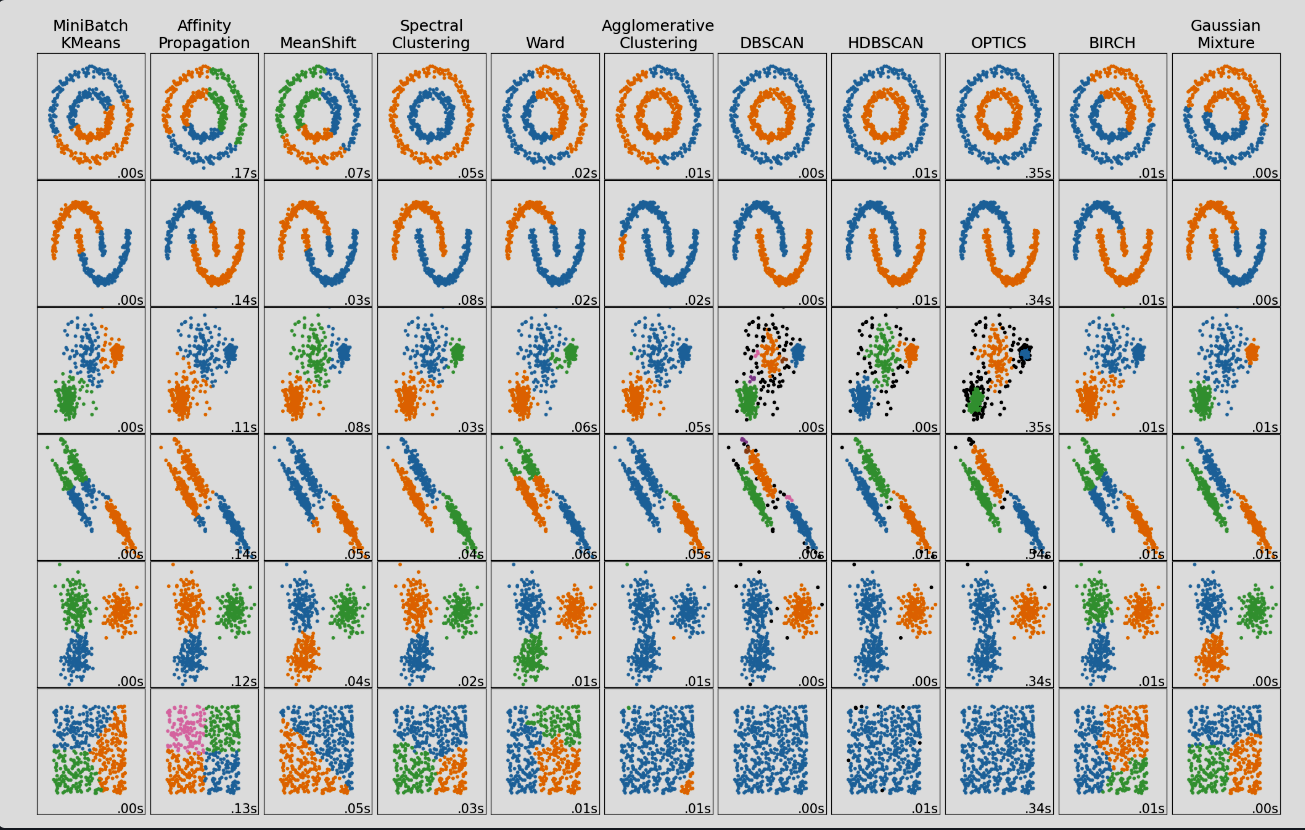